In [24]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as dr
import datetime as dt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [25]:
# Loding Financial dataset
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2014,9,17)
end = dt.datetime.now()

df = dr.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)

(2862,)


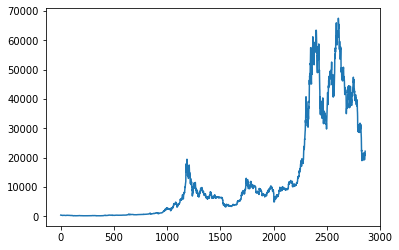

In [26]:
df1 = df.reset_index()['Close']
print(df1.shape)
plt.plot(df1)

In [27]:
# Scaling
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1.shape)

(2862, 1)


In [28]:
# Splittting the dataset
training_size = int(len(df1)*0.65)
test_size = int(len(df1)) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1):1]
print(train_data.shape)
print(test_data.shape)

(1860, 1)
(1002, 1)


In [29]:
def create_dataset(dataset, time_step = 1):
    datax, datay = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [30]:
time_step = 100
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [31]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1759, 100), (1759,), (901, 100), (901,))

In [32]:
# Training
model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [11]:
# Let's do the prediction
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict.shape

(1759,)

In [12]:
print("Train Analysis")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_train, train_predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_train, train_predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_train, train_predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_train, train_predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% ')

Train Analysis
Mean Absolute Error: 0.0007
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0016
(R^2) Score: 0.9992
Train Score : 99.92% 


In [13]:
print("Test Analysis")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, test_predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, test_predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, test_predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, test_predict), 4))
print(f'Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Forest Regressor.')
errors = abs(test_predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy,5), '%.') 

Test Analysis
Mean Absolute Error: 0.2649
Mean Squared Error: 0.1241
Root Mean Squared Error: 0.3522
(R^2) Score: -0.7597
Test Score : -75.97% using Random Tree Regressor.
Accuracy: 58.68159 %.


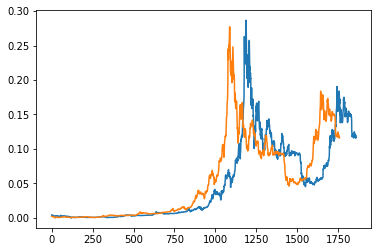

In [14]:
# train Plot
plt.plot(train_data)
plt.plot(train_predict)

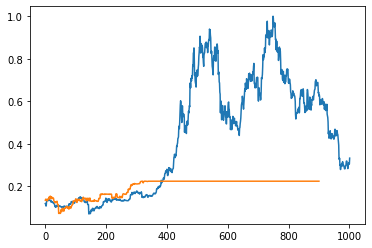

In [15]:
# Test Plot
plt.plot(test_data)
plt.plot(test_predict)

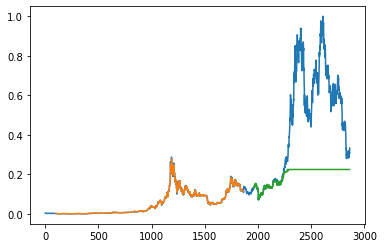

In [16]:
# Plotting
# shift train prediction for plotting
look_back = 100
l = len(df1)
trainPredictPlot = np.empty_like(df1)
trainPredictPlot =trainPredictPlot.reshape(l,)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict

# Shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot =testPredictPlot.reshape(l,)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1] = test_predict

# plt baseline and prediction
plt.plot(df1)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [17]:
x_input = test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [18]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [20]:
# prediction for future
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps))
        #print(x_input)
        yhat = model.predict(x_input)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.append(yhat[0].tolist())
        print(len(temp_input))
        lst_output.append(yhat.tolist())
        i=i+1

0 day input [0.58383356 0.5928155  0.60824162 0.58997128 0.5991412  0.59722723
 0.58672797 0.60318862 0.61322791 0.61132297 0.59875387 0.58707473
 0.58331164 0.58305288 0.59772915 0.56299266 0.57966697 0.58757196
 0.57029898 0.55701858 0.56821064 0.56910448 0.55754653 0.58645223
 0.54010575 0.53217833 0.52418042 0.50277198 0.44694198 0.4577146
 0.42675169 0.42840474 0.43189718 0.44403812 0.46190235 0.44050121
 0.44885483 0.42354516 0.4471999  0.43067497 0.43411006 0.44733922
 0.42916389 0.43742455 0.43604117 0.43166155 0.4221696  0.42494939
 0.43431381 0.4681538  0.469132   0.4395539  0.4494726  0.43814878
 0.44005597 0.44115034 0.46287519 0.45968187 0.44571629 0.44419738
 0.42893973 0.41821102 0.39449545 0.33105368 0.32688985 0.33232172
 0.29980605 0.30113909 0.27956516 0.30235278 0.30303933 0.30468739
 0.29395016 0.31025626 0.31241952 0.31643624 0.30938695 0.3050566
 0.29830705 0.29568627 0.29094813 0.28330057 0.28289826 0.28371175
 0.29757439 0.29696381 0.30227821 0.31844325 0.31983

12 day output [0.21439553]
13 day input [0.58305288 0.59772915 0.56299266 0.57966697 0.58757196 0.57029898
 0.55701858 0.56821064 0.56910448 0.55754653 0.58645223 0.54010575
 0.53217833 0.52418042 0.50277198 0.44694198 0.4577146  0.42675169
 0.42840474 0.43189718 0.44403812 0.46190235 0.44050121 0.44885483
 0.42354516 0.4471999  0.43067497 0.43411006 0.44733922 0.42916389
 0.43742455 0.43604117 0.43166155 0.4221696  0.42494939 0.43431381
 0.4681538  0.469132   0.4395539  0.4494726  0.43814878 0.44005597
 0.44115034 0.46287519 0.45968187 0.44571629 0.44419738 0.42893973
 0.41821102 0.39449545 0.33105368 0.32688985 0.33232172 0.29980605
 0.30113909 0.27956516 0.30235278 0.30303933 0.30468739 0.29395016
 0.31025626 0.31241952 0.31643624 0.30938695 0.3050566  0.29830705
 0.29568627 0.29094813 0.28330057 0.28289826 0.28371175 0.29757439
 0.29696381 0.30227821 0.31844325 0.31983116 0.31776983 0.30691108
 0.29370571 0.28411001 0.29728966 0.30259983 0.30655314 0.31180607
 0.30570753 0.33321494

23 day output [0.16407507]
24 day input [0.54010575 0.53217833 0.52418042 0.50277198 0.44694198 0.4577146
 0.42675169 0.42840474 0.43189718 0.44403812 0.46190235 0.44050121
 0.44885483 0.42354516 0.4471999  0.43067497 0.43411006 0.44733922
 0.42916389 0.43742455 0.43604117 0.43166155 0.4221696  0.42494939
 0.43431381 0.4681538  0.469132   0.4395539  0.4494726  0.43814878
 0.44005597 0.44115034 0.46287519 0.45968187 0.44571629 0.44419738
 0.42893973 0.41821102 0.39449545 0.33105368 0.32688985 0.33232172
 0.29980605 0.30113909 0.27956516 0.30235278 0.30303933 0.30468739
 0.29395016 0.31025626 0.31241952 0.31643624 0.30938695 0.3050566
 0.29830705 0.29568627 0.29094813 0.28330057 0.28289826 0.28371175
 0.29757439 0.29696381 0.30227821 0.31844325 0.31983116 0.31776983
 0.30691108 0.29370571 0.28411001 0.29728966 0.30259983 0.30655314
 0.31180607 0.30570753 0.33321494 0.22483818 0.21734852 0.21356317
 0.21279496 0.21313892 0.21310224 0.21326383 0.21315924 0.21304529
 0.21308869 0.21306694 0

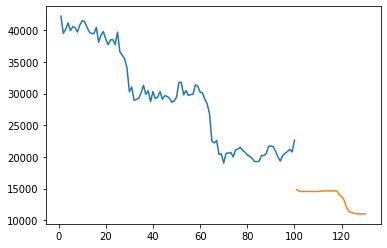

In [21]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

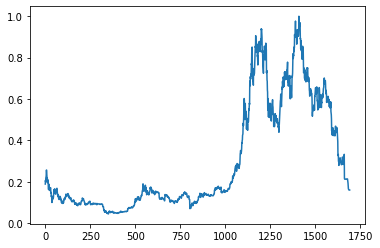

In [22]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

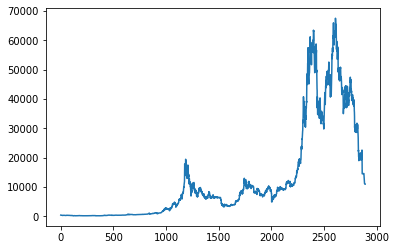

In [23]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)